In [1]:
from __future__ import absolute_import
from __future__ import print_function

import os
import datetime
from shutil import copyfile

In [2]:
from utils import import_test_configuration, set_sumo, set_test_path, set_train_path
from fixed_time import *

from generator import TrafficGenerator
from visualization import Visualization

In [3]:



if __name__ == "__main__":
    config = import_test_configuration(config_file='testing_settings.ini')
    sumo_cmd = set_sumo(config['gui'], config['sumocfg_file_name'], config['max_steps'])
#     model_path, plot_path = set_test_path(config['models_path_name'], config['model_to_test'])
    plot_path = set_train_path(config['models_path_name'])
    
    
    #PARAMETERS
    fixed_green_time = 30
    scenario_number = 0
    
    
    
    TrafficGen = TrafficGenerator(
        config['max_steps'], 
        config['penetration_rate']
    )
    
    
    Visualization = Visualization(
        plot_path, 
        dpi=96
    )
    
    
    Simulation = FixedTimeTestSimulation(
        TrafficGen,
        sumo_cmd,
        config['max_steps'],
        fixed_green_time,
        config['yellow_duration'],
        config['num_actions'],
        config['scenario_number']
    )
    
    episode = 0
    timestamp_start = datetime.datetime.now()
    
    
    total_episodes = 3
    
    while episode < total_episodes:
        print('\n----- Test Episode', str(episode+1), 'of', str(total_episodes))
        
        #run simulation + train for one episode at a time
        simulation_time = Simulation.run(episode * 10000)  # run the simulation (with a guaranteed different seed than in training)
        print('Simulation time:', simulation_time, 's')
        episode += 1
    
    
#     print('\n----- Test episode')
#     simulation_time = Simulation.run(config['episode_seed'])  # run the simulation
#     print('Simulation time:', simulation_time, 's')

    print("\n----- Start time:", timestamp_start)
    print("----- End time:", datetime.datetime.now())
    
    print("----- Testing info saved at:", plot_path)

    copyfile(src='testing_settings.ini', dst=os.path.join(plot_path, 'testing_settings.ini'))

    
#     Visualization.save_data_and_plot(data=Simulation.reward_episode, filename='reward', xlabel='Action step', ylabel='Reward')
#     Visualization.save_data_and_plot(data=Simulation.queue_length_episode, filename='queue', xlabel='Step', ylabel='Queue length [vehicles]')
#     Visualization.save_data_and_plot(data=Simulation.average_delay_episode, filename='average_delay', xlabel='Step', ylabel='Average delay [s]')
    
    
    
    
    all_average_delay = Simulation.average_delay_all_episodes
    
    Visualization.testing_save_data_and_plot(data=Simulation.average_delay_all_episodes, filename='average_delay', xlabel='Simulation step', ylabel='Average vehicle delay [s]')

    


----- Test Episode 1 of 3
Simulating...
Simulation time: 7.3 s

----- Test Episode 2 of 3
Simulating...
Simulation time: 6.9 s

----- Test Episode 3 of 3
Simulating...
Simulation time: 8.4 s

----- Start time: 2020-06-11 22:33:32.002935
----- End time: 2020-06-11 22:33:54.627855
----- Testing info saved at: C:\Users\Chantal\Documents\Deep-QLearning-Agent-for-Traffic-Signal-Control\TLCS\models\model_223\
mean [ 0.33333333  0.98195319  0.95340519 ... 25.15527383 20.30596179
 20.32929213]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rollavg_pandas(a,n):
    'Pandas rolling average'
    return np.ravel(pd.DataFrame(a).rolling(n, center=True, min_periods=1).mean().to_numpy())


print(len(all_average_delay[0]))

5400


In [5]:
delay_array = np.asarray(all_average_delay)

print(delay_array.shape)
# print("delay: ", delay_array)

mean = np.mean(delay_array, axis=0)
std_dev = np.std(delay_array, axis=0)
steps = np.arange(5400)

# print("mean: ", mean)


window = 10

mean = rollavg_pandas(mean, window)
std_dev = rollavg_pandas(std_dev, window)


print(mean.shape, std_dev.shape)

# print(steps)

print(len(mean))

(3, 5400)
(5400,) (5400,)
5400


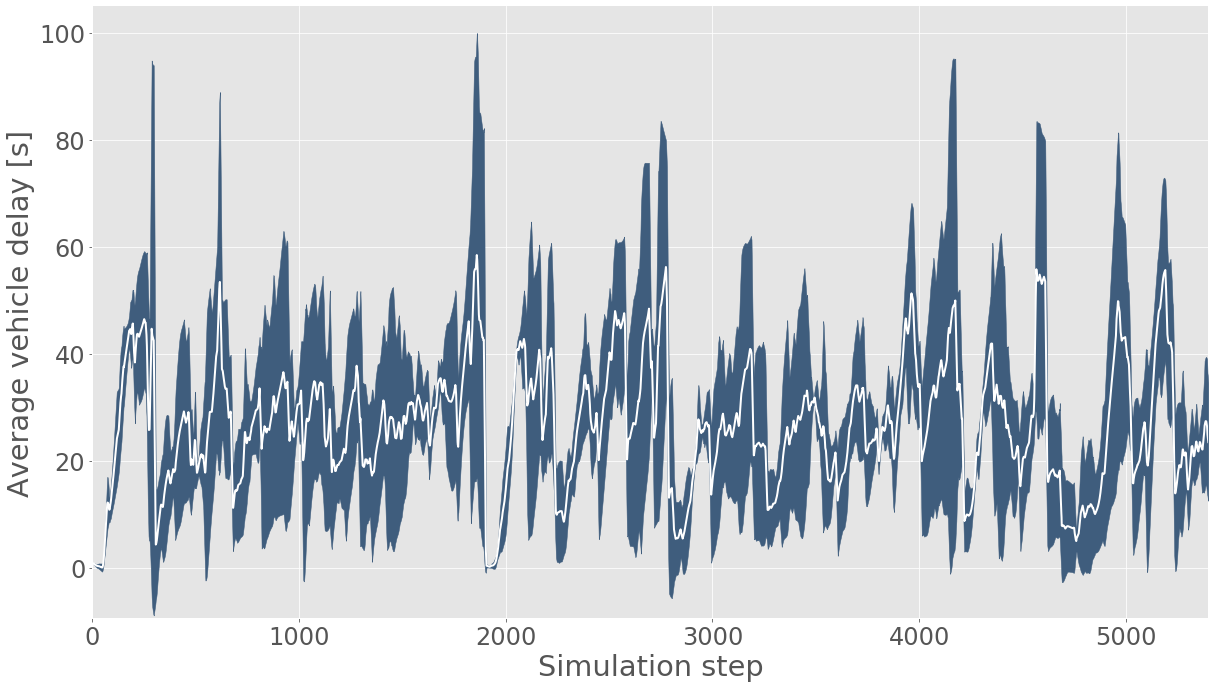

In [6]:
plt.figure(figsize=(20, 11.25)) 

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 24})  # set bigger font size


ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

#limit only to where the data is
min_val = min(min(mean),min(mean-std_dev))
max_val = max(max(mean),max(mean+std_dev))
plt.ylim(min_val - 0.05 * abs(min_val), max_val + 0.05 * abs(max_val))

plt.ylabel("Average vehicle delay [s]")
plt.xlabel("Simulation step")
plt.margins(0)

#plot the error bars in blue
plt.fill_between(steps, mean - std_dev, mean + std_dev, color="#3F5D7D")  

#plot the means in white
plt.plot(steps, mean, color="white", lw=2)  


In [7]:
# import numpy as np
# import math
# import matplotlib.pyplot as plt

# # timings = np.random.uniform(0,5400, 1000)
# # timings = np.random.weibull(2, 1000)

# timings = np.linspace(0, 5400, num=2000)
# # print(len(timings))
# # print(timings)
# timings = np.sort(timings)

# # reshape the distribution to fit the interval 0:max_steps
# car_gen_steps = []
# min_old = math.floor(timings[0])
# max_old = math.ceil(timings[-1])

# print(min_old, max_old)

# min_new = 0
# max_new = 5400
# for value in timings:
#     car_gen_steps = np.append(car_gen_steps, ((max_new - min_new) / (max_old - min_old)) * (value - max_old) + max_new)

# car_gen_steps = np.rint(car_gen_steps)  # round every value to int -> effective steps when a car will be generated

# # print(car_gen_steps)

# plt.figure()
# plt.hist(car_gen_steps, bins = 25)
# # plt.yticks(np.arange(0, 25, 3))
# plt.yticks(np.arange(0, 300, 25))
# plt.grid()
# # plt.plot(queue)

# plt.show()

In [8]:
# import numpy as np
# import math
# import matplotlib.pyplot as plt

# # timings = np.random.uniform(0,5400, 1000)
# timings = np.random.weibull(2, 2000)

# # timings = np.linspace(0, 5400, num=7000)
# # print(len(timings))
# # print(timings)
# timings = np.sort(timings)

# # reshape the distribution to fit the interval 0:max_steps
# car_gen_steps = []
# min_old = math.floor(timings[0])
# max_old = math.ceil(timings[-1])


# min_new = 0
# max_new = 5400
# for value in timings:
#     car_gen_steps = np.append(car_gen_steps, ((max_new - min_new) / (max_old - min_old)) * (value - max_old) + max_new)

# car_gen_steps = np.rint(car_gen_steps)  # round every value to int -> effective steps when a car will be generated


# #-------plotting





# fig,ax = plt.subplots()

# ax.hist(car_gen_steps, bins = 25, color ='red')
# # # set x-axis label
# ax.set_xlabel("time",fontsize=14)
# # # set y-axis label
# ax.set_ylabel("number of cars",color="red",fontsize=14)
# plt.yticks(np.arange(0, 300, 25))
# plt.grid()
# plt.show()

# # twin object for two different y-axis on the sample plot
# # ax2=ax.twinx()
# # ax2.plot(queue,color="blue")
# # ax2.set_ylabel("queue length",color="blue",fontsize=14)
# # plt.show()




In [9]:
# print(int(len(car_gen_steps)/2))

# print(car_gen_steps[int(len(car_gen_steps)/2)])